In [1]:
import os
import random
import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [16]:
TRAIN_DIR = 'test'
CATEGORIES = []
for c in os.listdir(TRAIN_DIR):
    CATEGORIES.append(c)
print(CATEGORIES)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [17]:
TRAIN_DATA = []
for c in CATEGORIES:
    path = os.path.join(TRAIN_DIR,c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        TRAIN_DATA.append([img_arr, class_num])
print(len(TRAIN_DATA))

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 7482.72it/s]

10000


In [18]:
random.shuffle(TRAIN_DATA)

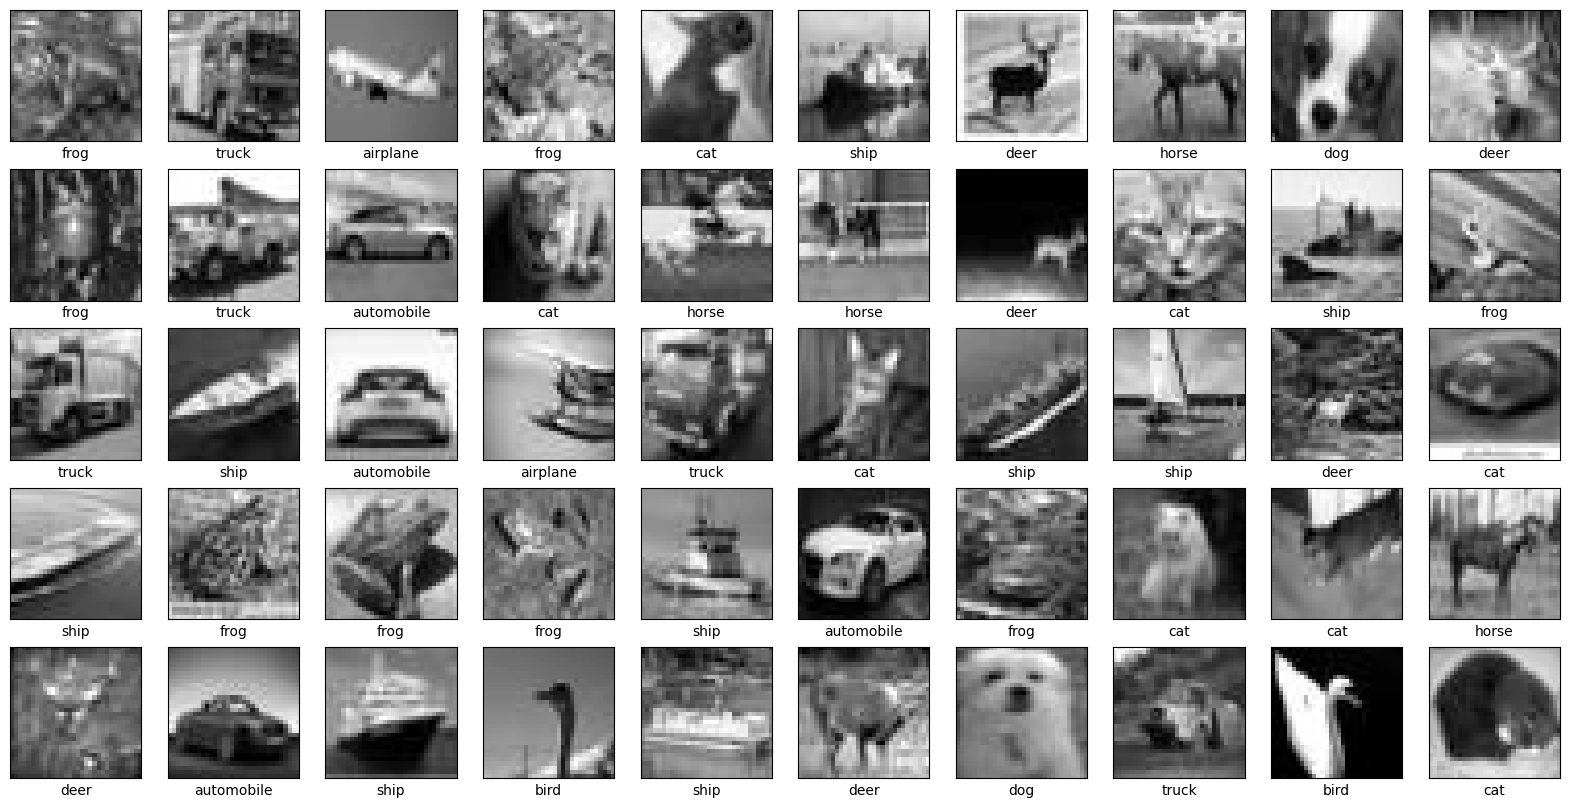

In [19]:
plt.figure(figsize=(20,10))

for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(TRAIN_DATA[i][0], cmap='gray')
    plt.xlabel(CATEGORIES[TRAIN_DATA[i][1]])
    plt.xticks([])
    plt.yticks([])
    if i==50:
        break
plt.show()

In [20]:
f0 = TRAIN_DATA[:1000]
f1 = TRAIN_DATA[1000:2000]
f2 = TRAIN_DATA[2000:3000]
f3 = TRAIN_DATA[3000:4000]
f4 = TRAIN_DATA[4000:5000]

In [21]:
def plot_Accuracies(fold,k_choices,accuracies):
    best = [0,0]
    for k in k_choices:
        accu = accuracies[k]
        if best[1]< max(accu):
            best[0]=k
            best[1]=max(accu)
        plt.scatter([k] * len(accu), accu)

    # plot the trend line with error bars that correspond to standard deviation

    accuracies_mean = np.array([np.mean(v) for k,v in sorted(accuracies.items())])
    accuracies_std = np.array([np.std(v) for k,v in sorted(accuracies.items())])
    plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
    plt.title(f"Cross-validation   fold={fold}   K={best[0]}   Accuracy = {best[1]}")
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.show()

In [22]:
k_values = [1, 3, 5, 7, 9]

In [23]:
k_values_error_l1 = {}
k_values_error_l2 = {}
for k in k_values:
    k_values_error_l1[k]=[]
    k_values_error_l2[k]=[]

In [24]:
midpoint_l1_accuracies = []
midpoint_l2_accuracies = []

for i in range(5):
    if i==0:
        train = f1+f2+f3+f4
        validation = f0
    elif i==1:
        train = f0+f2+f3+f4
        validation = f1
    elif i==2:
        train = f0+f1+f3+f4
        validation = f2
    elif i==3:
        train = f0+f1+f2+f4
        validation = f3
    elif i==4:
        train = f0+f1+f2+f3
        validation = f4

    l1_accuracies = []
    l2_accuracies = []
    for k in k_values:
        l1_correct = 0
        l2_correct = 0
        total = 0
        for v in tqdm(validation):
            v_img = v[0]
            v_label = v[1]
            l1_scores = []
            l2_scores = []
            for t in train:
                t_img = t[0]
                t_label = t[1]
               
                l1_dist = np.sum(np.abs(t_img - v_img))
                l1_scores.append((l1_dist, t_label))
                
                l2_dist = np.sqrt(np.sum((t_img - v_img) ** 2))
                l2_scores.append((l2_dist, t_label))
            sorted_l1_scores = sorted(l1_scores, key=lambda x: x[0])[:k]
            l1_neighbors = [s[1] for s in sorted_l1_scores]
            l1_prediction = max(set(l1_neighbors), key=l1_neighbors.count)

            sorted_l2_scores = sorted(l2_scores, key=lambda x: x[0])[:k]
            l2_neighbors = [s[1] for s in sorted_l2_scores]
            l2_prediction = max(set(l2_neighbors), key=l2_neighbors.count)
            if l1_prediction == v_label:
                l1_correct += 1
            if l2_prediction == v_label:
                l2_correct += 1

            total += 1

        l1_accuracy = l1_correct / total
        l1_accuracies.append(l1_accuracy)
        k_values_error_l1[k].append(l1_accuracy)

        l2_accuracy = l2_correct / total
        l2_accuracies.append(l2_accuracy)
        k_values_error_l2[k].append(l2_accuracy)

        print("Fold {}, k = {}, L1 accuracy = {:.2f}%, L2 accuracy = {:.2f}%".format(i, k, l1_accuracy * 100, l2_accuracy * 100))

    min_l1_accuracy = min(l1_accuracies)
    max_l1_accuracy = max(l1_accuracies)
    midpoint_l1_accuracy = (min_l1_accuracy + max_l1_accuracy) / 2
    midpoint_l1_accuracies.append(midpoint_l1_accuracy)

    min_l2_accuracy = min(l2_accuracies)
    max_l2_accuracy = max(l2_accuracies)
    midpoint_l2_accuracy = (min_l2_accuracy + max_l2_accuracy) / 2
    midpoint_l2_accuracies.append(midpoint_l2_accuracy)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:38<00:00, 10.11it/s]


Fold 0, k = 1, L1 accuracy = 17.10%, L2 accuracy = 15.70%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:50<00:00,  9.06it/s]


Fold 0, k = 3, L1 accuracy = 17.60%, L2 accuracy = 13.50%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:42<00:00,  6.17it/s]


Fold 0, k = 5, L1 accuracy = 17.10%, L2 accuracy = 15.30%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:32<00:00,  6.56it/s]


Fold 0, k = 7, L1 accuracy = 17.20%, L2 accuracy = 15.50%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:04<00:00,  8.06it/s]


Fold 0, k = 9, L1 accuracy = 17.20%, L2 accuracy = 14.80%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:47<00:00,  9.27it/s]


Fold 1, k = 1, L1 accuracy = 17.60%, L2 accuracy = 15.00%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:59<00:00,  8.36it/s]


Fold 1, k = 3, L1 accuracy = 18.40%, L2 accuracy = 14.10%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:56<00:00,  8.55it/s]


Fold 1, k = 5, L1 accuracy = 16.60%, L2 accuracy = 14.20%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:52<00:00,  8.85it/s]


Fold 1, k = 7, L1 accuracy = 17.00%, L2 accuracy = 13.70%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:48<00:00,  9.23it/s]


Fold 1, k = 9, L1 accuracy = 17.40%, L2 accuracy = 14.00%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:48<00:00,  9.21it/s]


Fold 2, k = 1, L1 accuracy = 16.00%, L2 accuracy = 15.60%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:51<00:00,  9.00it/s]


Fold 2, k = 3, L1 accuracy = 15.60%, L2 accuracy = 14.00%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:48<00:00,  9.23it/s]


Fold 2, k = 5, L1 accuracy = 14.70%, L2 accuracy = 14.90%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:49<00:00,  9.13it/s]


Fold 2, k = 7, L1 accuracy = 14.50%, L2 accuracy = 13.20%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:47<00:00,  9.31it/s]


Fold 2, k = 9, L1 accuracy = 14.40%, L2 accuracy = 13.40%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:51<00:00,  8.98it/s]


Fold 3, k = 1, L1 accuracy = 17.80%, L2 accuracy = 14.60%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:54<00:00,  8.70it/s]


Fold 3, k = 3, L1 accuracy = 15.90%, L2 accuracy = 13.60%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [04:00<00:00,  4.16it/s]


Fold 3, k = 5, L1 accuracy = 17.50%, L2 accuracy = 14.30%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [06:19<00:00,  2.63it/s]


Fold 3, k = 7, L1 accuracy = 17.40%, L2 accuracy = 14.00%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:09<00:00,  2.33it/s]


Fold 3, k = 9, L1 accuracy = 17.80%, L2 accuracy = 14.30%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [06:02<00:00,  2.76it/s]


Fold 4, k = 1, L1 accuracy = 15.90%, L2 accuracy = 15.00%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:24<00:00,  6.93it/s]


Fold 4, k = 3, L1 accuracy = 16.30%, L2 accuracy = 14.20%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:06<00:00,  7.89it/s]


Fold 4, k = 5, L1 accuracy = 15.20%, L2 accuracy = 15.40%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:11<00:00,  7.62it/s]


Fold 4, k = 7, L1 accuracy = 15.40%, L2 accuracy = 14.90%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:01<00:00,  8.21it/s]

Fold 4, k = 9, L1 accuracy = 15.40%, L2 accuracy = 14.20%


In [25]:
print("Midpoint L1 accuracy for Fold {} = {:.2f}%, Midpoint L2 accuracy for Fold {} = {:.2f}%".format(i, midpoint_l1_accuracy * 100, i, midpoint_l2_accuracy * 100))

Midpoint L1 accuracy for Fold 4 = 15.75%, Midpoint L2 accuracy for Fold 4 = 14.80%


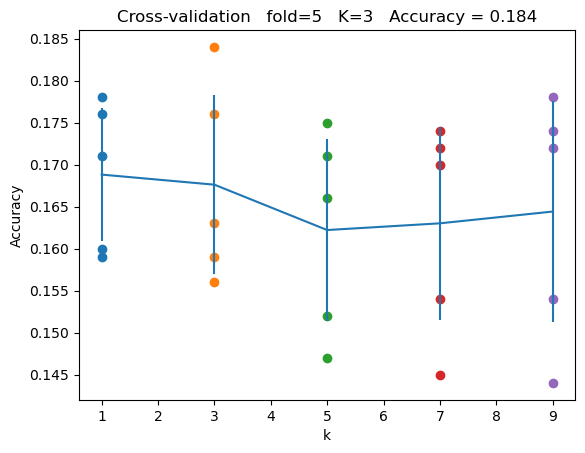

In [26]:
plot_Accuracies(5,k_values,k_values_error_l1)

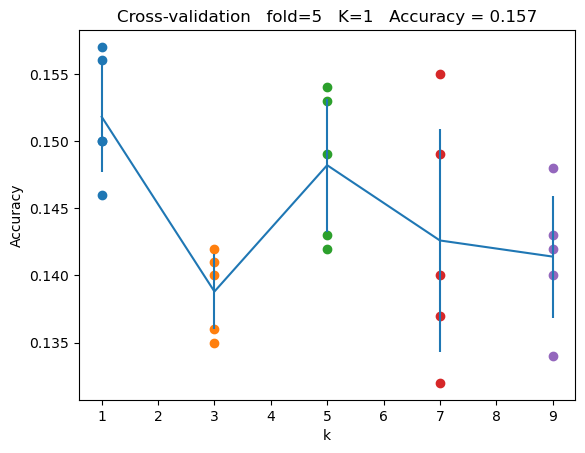

In [27]:
plot_Accuracies(5,k_values,k_values_error_l2)

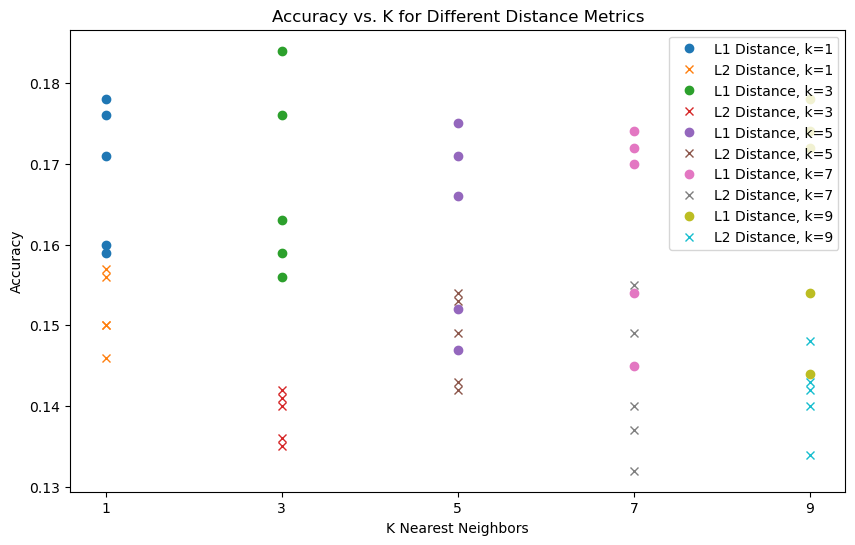

In [34]:
plt.figure(figsize=(10, 6))
for k in k_values:
    plt.plot([k] * 5, k_values_error_l1[k], 'o', label=f"L1 Distance, k={k}")
    plt.plot([k] * 5, k_values_error_l2[k], 'x', label=f"L2 Distance, k={k}")

plt.title('Accuracy vs. K for Different Distance Metrics')
plt.xlabel('K Nearest Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.legend()
plt.show()


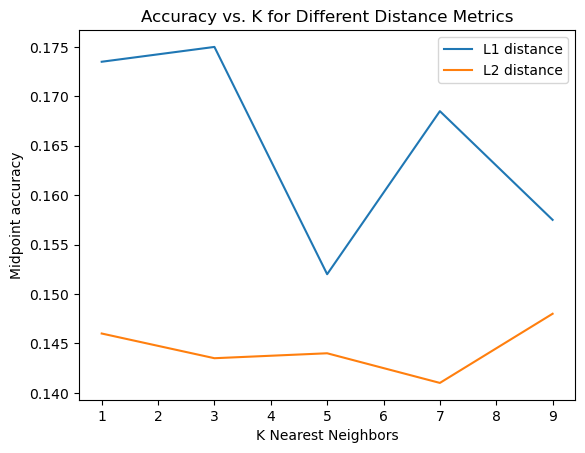

In [35]:
plt.plot(k_values, midpoint_l1_accuracies, label='L1 distance')
plt.plot(k_values, midpoint_l2_accuracies, label='L2 distance')
plt.xlabel('K Nearest Neighbors')
plt.ylabel('Midpoint accuracy')
plt.title('Accuracy vs. K for Different Distance Metrics')
plt.legend()
plt.show()

 Discussion : Within the framework of the grayscale CIFAR-10 dataset, the respective advantages and disadvantages of each method 
are shown by contrasting the Manhattan (L1) and Euclidean (L2) distances performances based on the average accuracy values
derived from the 5-fold cross-validation.
When the data is analyzed, it becomes clear that the two distance metrics function differently. 
In capturing the underlying relationships within the image data, the L2 distance appears to be more effective, 
as seen by its consistently superior accuracy across a range of K values. The L2 metric's 
ability to capture more complex patterns in the grayscale images is probably what causes this, as it is sensitive to even the 
smallest variations in pixel values.

